In [27]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pada bagian awal, program mengimpor beberapa library utama yaitu pandas, numpy, matplotlib, dan seaborn. Pandas digunakan untuk mengolah data dalam bentuk tabel (DataFrame), numpy dipakai untuk melakukan perhitungan matematis seperti operasi vektor dan matriks, sedangkan matplotlib dan seaborn berfungsi untuk membuat visualisasi agar hasil analisis lebih mudah dipahami.

In [22]:
# Import Data Excel langsung ke df
df = pd.read_excel('/content/DATA MAHASISWA MATDIS A.xlsx')
print("Data Mahasiswa Matdis A")
display(df.head())

Data Mahasiswa Matdis A


,NPM,NAMA,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOROL,ASYIK DAN MENARIK
0,24083010001,MADINA HEDY ALIFANTI,0.6,0.8,0.9,0.2
1,24083010003,MARIA DWI KURNIASIH,0.7,0.0,1.0,1.0
2,24083010005,ADINDA PUTRI RACHMAWATI,0.1,0.9,0.5,0.2
3,24083010006,AQUINA SYABITA,0.0,0.0,0.0,0.9
4,24083010007,VARID PUTRA PRATAMA,0.5,0.7,0.2,0.4


Pada bagian ini, program membaca dataset mahasiswa secara langsung dari file Excel bernama DATA MAHASISWA MATDIS A.xlsx. Data yang dimuat berisi daftar mahasiswa beserta nilai penilaian mereka pada beberapa kriteria. Setelah file berhasil dibaca, program menampilkan lima baris pertama dari tabel menggunakan fungsi display(df.head()). Tujuannya adalah untuk memastikan bahwa data sudah terbaca dengan benar serta memberikan gambaran awal mengenai struktur dataset yang akan digunakan dalam analisis selanjutnya.

In [23]:
# Cek nama kolom yang terbaca dari Excel
print("\nKolom dalam dataset:", df.columns.tolist())

# Tentukan bobot P untuk kriteria
P = np.array([0.25, 0.25, 0.25, 0.25])

# Hitung skor total tiap mahasiswa (C.P)
df["Score"] = df[[
    "ADIL DAN AMANAH",
    "SUKA MEMBANTU",
    "NYAMBUNG KALAU NGOROL",
    "ASYIK DAN MENARIK"
]].values @ P


Kolom dalam dataset: ['NPM', 'NAMA', 'ADIL DAN AMANAH', 'SUKA MEMBANTU', 'NYAMBUNG KALAU NGOROL', 'ASYIK DAN MENARIK']


ada bagian ini, program terlebih dahulu mengecek nama-nama kolom yang terbaca dari file Excel menggunakan df.columns.tolist(). Hal ini penting agar tidak terjadi kesalahan penulisan nama kolom pada saat analisis, karena nama kolom harus sesuai dengan yang ada dalam dataset. Setelah itu, program menentukan bobot untuk setiap kriteria, yaitu [0.25, 0.25, 0.25, 0.25]. Bobot ini dipilih sama rata karena semua kriteria dianggap memiliki tingkat kepentingan yang seimbang. Selanjutnya, dihitung skor total tiap mahasiswa dengan cara mengalikan nilai mereka pada setiap kriteria dengan bobot yang sudah ditentukan (perkalian C × P). Hasil perhitungan ini disimpan dalam kolom baru bernama Score, yang menjadi representasi nilai gabungan mahasiswa secara keseluruhan.

In [24]:
# Ambil 4 mahasiswa dengan skor terbaik
top4 = df.nlargest(4, "Score")[["NPM", "NAMA", "Score"]]
print("=== 4 Siswa Terbaik Berdasarkan Skor (C.P) ===")
print(top4)

=== 4 Siswa Terbaik Berdasarkan Skor (C.P) ===
            NPM                           NAMA  Score
15  24083010047     SITI NAIA HESTI RACHMAWATI  0.825
36  24083010105            Indra Maulana R F Y  0.800
35  24083010099  Rizky Faza Hafiyyan Nusantara  0.775
13  24083010044                     VIA AMANDA  0.725


Pada bagian ini, program mengambil empat mahasiswa dengan skor tertinggi berdasarkan hasil perhitungan sebelumnya. Fungsi df.nlargest(4, "Score") digunakan untuk memilih empat baris dengan nilai terbesar pada kolom Score. Data yang ditampilkan hanya mencakup NPM, NAMA, dan Score agar fokus pada identitas mahasiswa dan peringkatnya. Hasil keluaran menunjukkan empat mahasiswa dengan kombinasi nilai terbaik di semua kriteria, sehingga mereka bukan hanya unggul dalam satu aspek, melainkan memiliki performa yang baik secara menyeluruh.

In [25]:
# Matriks Kovarian & Korelasi
X = df[[
    "ADIL DAN AMANAH",
    "SUKA MEMBANTU",
    "NYAMBUNG KALAU NGOROL",
    "ASYIK DAN MENARIK"
]].values

cov_mat = np.cov(X, rowvar=False, ddof=1)
corr_mat = np.corrcoef(X, rowvar=False)

print("\n=== Matriks Kovarian ===")
print(cov_mat)

print("\n=== Matriks Korelasi ===")
print(corr_mat)


=== Matriks Kovarian ===
[[ 0.10717308  0.01107692  0.01516667  0.00857051]
 [ 0.01107692  0.12471795  0.01610256  0.0014359 ]
 [ 0.01516667  0.01610256  0.11823077 -0.00552564]
 [ 0.00857051  0.0014359  -0.00552564  0.09096795]]

=== Matriks Korelasi ===
[[ 1.          0.09581021  0.1347355   0.08680001]
 [ 0.09581021  1.          0.13260665  0.01348077]
 [ 0.1347355   0.13260665  1.         -0.0532811 ]
 [ 0.08680001  0.01348077 -0.0532811   1.        ]]


Pada bagian ini, program melakukan analisis statistik untuk melihat hubungan antar kriteria. Pertama, nilai mahasiswa dari keempat kriteria dimasukkan ke dalam sebuah matriks bernama **X**. Dari matriks ini, dihitung **matriks kovarian** menggunakan `np.cov`, yang menggambarkan seberapa besar variasi dua kriteria saling berubah secara linier. Selanjutnya, dihitung juga **matriks korelasi** dengan `np.corrcoef`, yang menunjukkan kekuatan dan arah hubungan antar kriteria dalam skala -1 hingga 1. Jika nilainya mendekati 1, berarti dua kriteria memiliki hubungan positif yang kuat, sedangkan jika mendekati -1 berarti hubungannya negatif. Informasi ini membantu memahami keterkaitan antar aspek penilaian mahasiswa.


In [26]:
# Cosine Similarity antar mahasiswa
norms = np.linalg.norm(X, axis=1, keepdims=True)
cosine_sim = (X @ X.T) / (norms @ norms.T)

cosine_df = pd.DataFrame(cosine_sim, index=df["NAMA"], columns=df["NAMA"])

print("\n=== Cosine Similarity Seluruh Mahasiswa ===")
display(cosine_df)


=== Cosine Similarity Seluruh Mahasiswa ===


NAMA,MADINA HEDY ALIFANTI,MARIA DWI KURNIASIH,ADINDA PUTRI RACHMAWATI,AQUINA SYABITA,VARID PUTRA PRATAMA,GAITSA NAZWA KANSA,Mohammad Alimun Hakim,HIZKIA SAMHAN REZAYOSHI,RAVEENA AYU DESEMBER SURYOPUTRI,Yohanes Olvin Jun Sole,...,ESTHI NURANI SRI HANDAYANI,Muhammad Naufal Asruzzaman,Laudya Meitaneia Sianturi,ADRIAN VEDA DARMAWAN,SELVY DWI YULITA SARI,Rizky Faza Hafiyyan Nusantara,Indra Maulana R F Y,YUNIAR RACHMAWATI,KIKY MAUDRY NATASYA,NAJWA SOFIA
NAMA,,,,,,,,,,,,,,,,,,,,,
MADINA HEDY ALIFANTI,1.000000,0.708203,0.886250,0.147043,0.849314,0.548631,0.532779,0.880425,0.764264,0.887230,...,0.793488,0.828384,0.840420,0.328798,0.619033,0.918771,0.863554,0.788489,0.802706,0.897351
MARIA DWI KURNIASIH,0.708203,1.000000,0.463158,0.633724,0.620955,0.935513,0.767780,0.753864,0.571950,0.653637,...,0.577282,0.770831,0.905509,0.765207,0.778138,0.853175,0.771345,0.875616,0.886705,0.869026
ADINDA PUTRI RACHMAWATI,0.886250,0.463158,1.000000,0.189832,0.841924,0.354140,0.580343,0.647349,0.795447,0.930033,...,0.770641,0.717011,0.743985,0.212238,0.324662,0.825399,0.762484,0.612010,0.452747,0.824561
AQUINA SYABITA,0.147043,0.633724,0.189832,1.000000,0.412568,0.811107,0.905822,0.237915,0.483494,0.309426,...,0.396059,0.512148,0.653197,0.894427,0.438529,0.515325,0.486864,0.592157,0.212000,0.502571
VARID PUTRA PRATAMA,0.849314,0.620955,0.841924,0.412568,1.000000,0.652543,0.724070,0.875228,0.989060,0.723404,...,0.990621,0.964038,0.875838,0.599645,0.732739,0.923512,0.972940,0.888999,0.568518,0.777543
GAITSA NAZWA KANSA,0.548631,0.935513,0.354140,0.811107,0.652543,1.000000,0.863294,0.707575,0.653609,0.485224,...,0.642493,0.810043,0.887437,0.943119,0.839438,0.804619,0.789799,0.907238,0.722208,0.745396
Mohammad Alimun Hakim,0.532779,0.767780,0.580343,0.905822,0.724070,0.863294,1.000000,0.529793,0.757304,0.653999,...,0.683884,0.768358,0.887520,0.860828,0.566051,0.809594,0.764881,0.797132,0.432076,0.788540
HIZKIA SAMHAN REZAYOSHI,0.880425,0.753864,0.647349,0.237915,0.875228,0.707575,0.529793,1.000000,0.817996,0.605298,...,0.879467,0.934167,0.835306,0.567462,0.904218,0.888878,0.936314,0.923568,0.849039,0.745885
RAVEENA AYU DESEMBER SURYOPUTRI,0.764264,0.571950,0.795447,0.483494,0.989060,0.653609,0.757304,0.817996,1.000000,0.656603,...,0.989376,0.949211,0.848758,0.648675,0.713821,0.882430,0.951392,0.869516,0.469794,0.717398


Pada bagian ini, program menghitung **cosine similarity** antar mahasiswa untuk mengukur tingkat kemiripan pola nilai mereka. Pertama, setiap vektor nilai mahasiswa dinormalisasi menggunakan `np.linalg.norm`, sehingga perbandingan dilakukan berdasarkan arah vektor, bukan besarannya. Kemudian, dihitung kesamaan antar mahasiswa dengan rumus `(X @ X.T) / (norms @ norms.T)`, yang menghasilkan nilai antara 0 hingga 1. Nilai yang semakin mendekati 1 menunjukkan bahwa dua mahasiswa memiliki pola penilaian yang sangat mirip. Hasil perhitungan ini kemudian dimasukkan ke dalam sebuah DataFrame bernama **cosine\_df**, dengan nama mahasiswa sebagai indeks dan kolom, sehingga membentuk sebuah matriks kesamaan yang mudah dibaca. Output ini membantu mengidentifikasi mahasiswa yang memiliki karakteristik penilaian serupa.


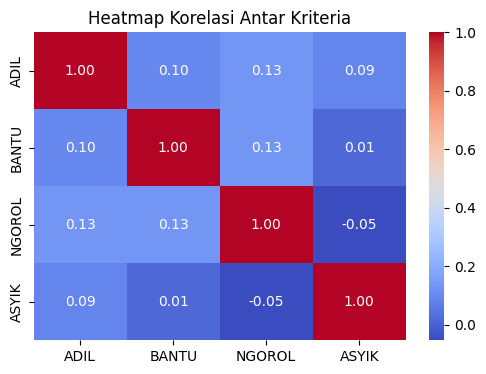

In [18]:
# Visualisasi 1. Heatmap Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=True, fmt=".2f",
            xticklabels=["ADIL", "BANTU", "NGOROL", "ASYIK"],
            yticklabels=["ADIL", "BANTU", "NGOROL", "ASYIK"],
            cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Antar Kriteria")
plt.show()

Pada bagian ini, program menampilkan **heatmap korelasi** untuk memperjelas hubungan antar kriteria dalam bentuk visual. Dengan menggunakan fungsi `sns.heatmap`, matriks korelasi yang telah dihitung sebelumnya divisualisasikan sebagai peta warna. Warna yang lebih terang atau mendekati merah menunjukkan korelasi positif yang tinggi, sedangkan warna yang lebih biru menunjukkan korelasi negatif atau hubungan yang lemah. Angka pada tiap kotak menunjukkan nilai korelasi dua kriteria dalam skala -1 hingga 1. Visualisasi ini memudahkan pembaca untuk segera melihat kriteria mana yang memiliki keterkaitan kuat serta kriteria mana yang lebih berdiri sendiri tanpa hubungan yang signifikan.


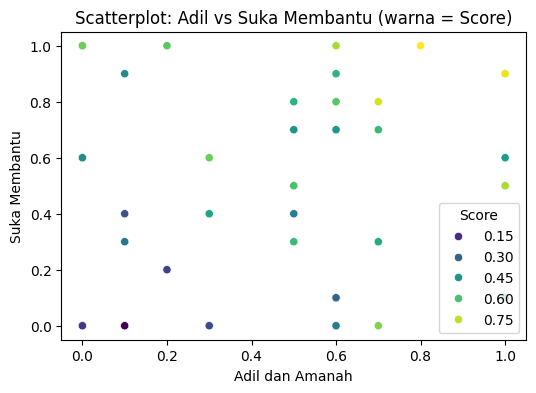

In [19]:
# Visualisasi 2. Scatterplot contoh (Adil vs Suka Membantu)
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["ADIL DAN AMANAH"], y=df["SUKA MEMBANTU"], hue=df["Score"], palette="viridis")
plt.xlabel("Adil dan Amanah")
plt.ylabel("Suka Membantu")
plt.title("Scatterplot: Adil vs Suka Membantu (warna = Score)")
plt.show()

Pada bagian ini, program membuat **scatterplot** untuk memperlihatkan hubungan antara dua kriteria, yaitu *Adil dan Amanah* serta *Suka Membantu*. Setiap titik pada grafik merepresentasikan seorang mahasiswa, dengan posisi horizontal (sumbu X) menunjukkan nilai *Adil dan Amanah* dan posisi vertikal (sumbu Y) menunjukkan nilai *Suka Membantu*. Warna setiap titik ditentukan oleh skor total mahasiswa, menggunakan palet warna *viridis* sehingga mahasiswa dengan skor lebih tinggi ditampilkan dengan warna yang lebih mencolok. Visualisasi ini berguna untuk melihat pola persebaran nilai antar mahasiswa, misalnya apakah mahasiswa dengan skor tinggi cenderung memiliki nilai baik pada kedua kriteria tersebut sekaligus.


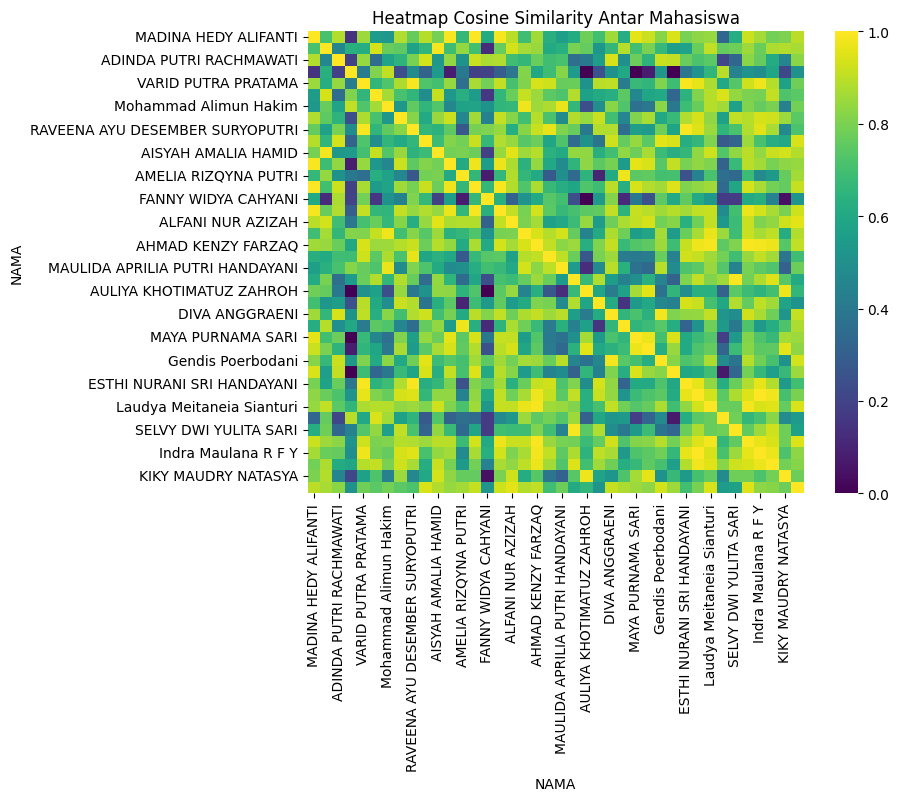

In [20]:
# Visualisasi 3. Heatmap Cosine Similarity
plt.figure(figsize=(8,6))
sns.heatmap(cosine_df, cmap="viridis", annot=False, cbar=True)
plt.title("Heatmap Cosine Similarity Antar Mahasiswa")
plt.show()

Pada bagian ini, program menampilkan **heatmap cosine similarity** yang menggambarkan tingkat kemiripan antar mahasiswa berdasarkan pola nilai mereka. Setiap sumbu horizontal dan vertikal berisi nama mahasiswa, sementara warna pada kotak menunjukkan seberapa mirip dua mahasiswa dibandingkan. Semakin terang warnanya (mendekati kuning dalam palet *viridis*), semakin tinggi tingkat kemiripannya, yang berarti kedua mahasiswa memiliki distribusi nilai yang hampir sama. Sebaliknya, warna yang lebih gelap menunjukkan kemiripan yang rendah. Visualisasi ini memudahkan untuk mengidentifikasi kelompok mahasiswa yang memiliki karakteristik penilaian serupa tanpa harus membaca angka pada matriks cosine similarity secara langsung.


/tmp/ipython-input-2711824825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score_variance", y="NAMA", data=df_ranked.head(5), palette="Blues_r")


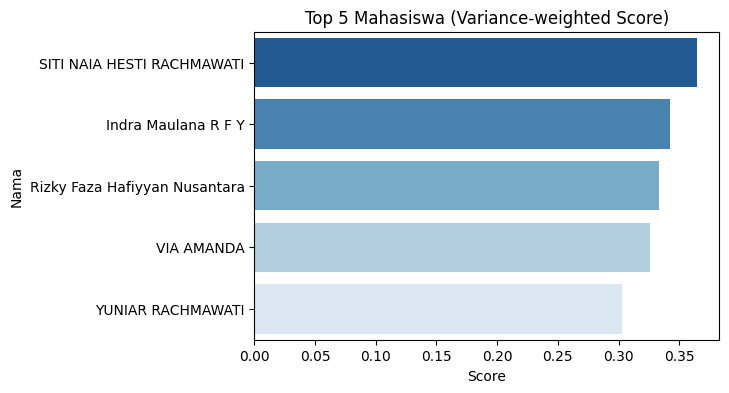

In [33]:
# Visualisasi 4. Ranking skor mahasiswa
plt.figure(figsize=(6,4))
sns.barplot(x="Score_variance", y="NAMA", data=df_ranked.head(5), palette="Blues_r")
plt.title("Top 5 Mahasiswa (Variance-weighted Score)")
plt.xlabel("Score")
plt.ylabel("Nama")
plt.show()

Pada tahap ini dilakukan **visualisasi keempat** berupa diagram batang (barplot) untuk menampilkan peringkat lima mahasiswa dengan skor tertinggi berdasarkan perhitungan *variance-weighted score*. Sumbu horizontal menggambarkan nilai skor yang telah dihitung, sedangkan sumbu vertikal menampilkan nama mahasiswa. Warna batang menggunakan palet **Blues\_r**, sehingga semakin tinggi skor mahasiswa maka warna batang akan terlihat semakin gelap. Visualisasi ini memberikan gambaran yang jelas mengenai siapa saja mahasiswa dengan performa terbaik dan memungkinkan perbandingan langsung antar skor dari lima mahasiswa teratas.
